In [1]:
import spacy
import numpy as np
import pandas as pd
import sklearn as skl
from collections import Counter, defaultdict
import json
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
with open('data_mod.json', 'r') as f:
    data = json.load(f)

In [4]:
vocab = []
for document in data:
    for token in document['tokenized_text']:
        vocab.append(token)

In [5]:
vocab = list(set(vocab))

In [6]:
def nlp_process(string1):
    string1 = string1.lower()
    doc = nlp(string1)
    token_list= [token.lemma_ for token in doc if (not token.is_stop and not token.is_punct and not token.pos_ in ('SYM','NUM','SPACE'))]
    return(token_list)

In [7]:
tfidf_vector = TfidfVectorizer(input = 'content', tokenizer = nlp_process)

In [8]:
sample_corpus = [article['text'] for article in data]

In [9]:
result = tfidf_vector.fit_transform(sample_corpus)
result

<26x1364 sparse matrix of type '<class 'numpy.float64'>'
	with 2268 stored elements in Compressed Sparse Row format>

In [10]:
dense = result.todense()
denselist = dense.tolist()
df = pd.DataFrame(
    denselist,columns=tfidf_vector.get_feature_names())

In [11]:
df.sort_values(by=0, axis=1, ascending=False)

,number,pandemic,people,stable,region,widespread,disease,history,endemic,worldwide,...,exercise,evolution,exemption,exchange,example,examiner,exacerbate,evolve,evolutionary,−
0,0.337033,0.308575,0.283997,0.200561,0.200561,0.200561,0.183500,0.182514,0.182514,0.157080,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.036894,0.190151,0.041964,0.125893,0.000000,0.019197,0.038188,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.000000,0.057842,0.000000,0.000000,0.000000,0.000000,0.060194,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.216577,0.000000,0.048666,0.000000,0.000000,0.000000,0.039305,0.000000,0.026063,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.032272
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.08364,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5,0.042401,0.022183,0.028583,0.000000,0.000000,0.000000,0.092341,0.000000,0.000000,0.039523,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
6,0.000000,0.131097,0.042229,0.000000,0.000000,0.000000,0.068214,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.000000,0.143099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.244542,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.223429,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


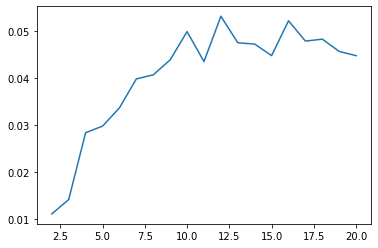

In [12]:
sil = []
kmax = 20

for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(result)
  labels = kmeans.labels_
  sil.append(silhouette_score(result, labels, metric = 'euclidean'))

plt.plot(range(2, kmax+1), sil)
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 10).fit(result)

titles = [article['title'] for article in data]
title_clusters = {titles[i]:kmeans.labels_[i] for i in range(len(titles))}
indexes = []
for i in range(10):
    j = 0
    for (key, value) in title_clusters.items():
        if value == i:
            print(key, value)
            indexes.append(j)
        j+=1
    print('----------------------------------')
print(indexes)

Basic reproduction number 0
----------------------------------
Pandemic prevention 1
Pandemic Severity Assessment Framework 1
Pandemic severity index 1
----------------------------------
Crimson Contagion 2
Disease X 2
Superspreader 2
Viral load 2
Virus 2
----------------------------------
Epidemiology of HIV/AIDS 3
HIV/AIDS 3
HIV/AIDS in Yunnan 3
PREDICT (USAID) 3
----------------------------------
Bills of mortality 4
Unified Victim Identification System 4
----------------------------------
Pandemic 5
Spanish flu 5
Swine influenza 5
----------------------------------
Antonine Plague 6
Plague of Cyprian 6
----------------------------------
Cholera 7
----------------------------------
COVID-19 pandemic 8
1929–1930 psittacosis pandemic 8
Science diplomacy and pandemics 8
----------------------------------
Event 201 9
Targeted immunization strategies 9
----------------------------------
[3, 12, 13, 14, 7, 8, 20, 24, 25, 1, 10, 11, 16, 4, 23, 0, 19, 21, 2, 15, 5, 6, 17, 18, 9, 22]


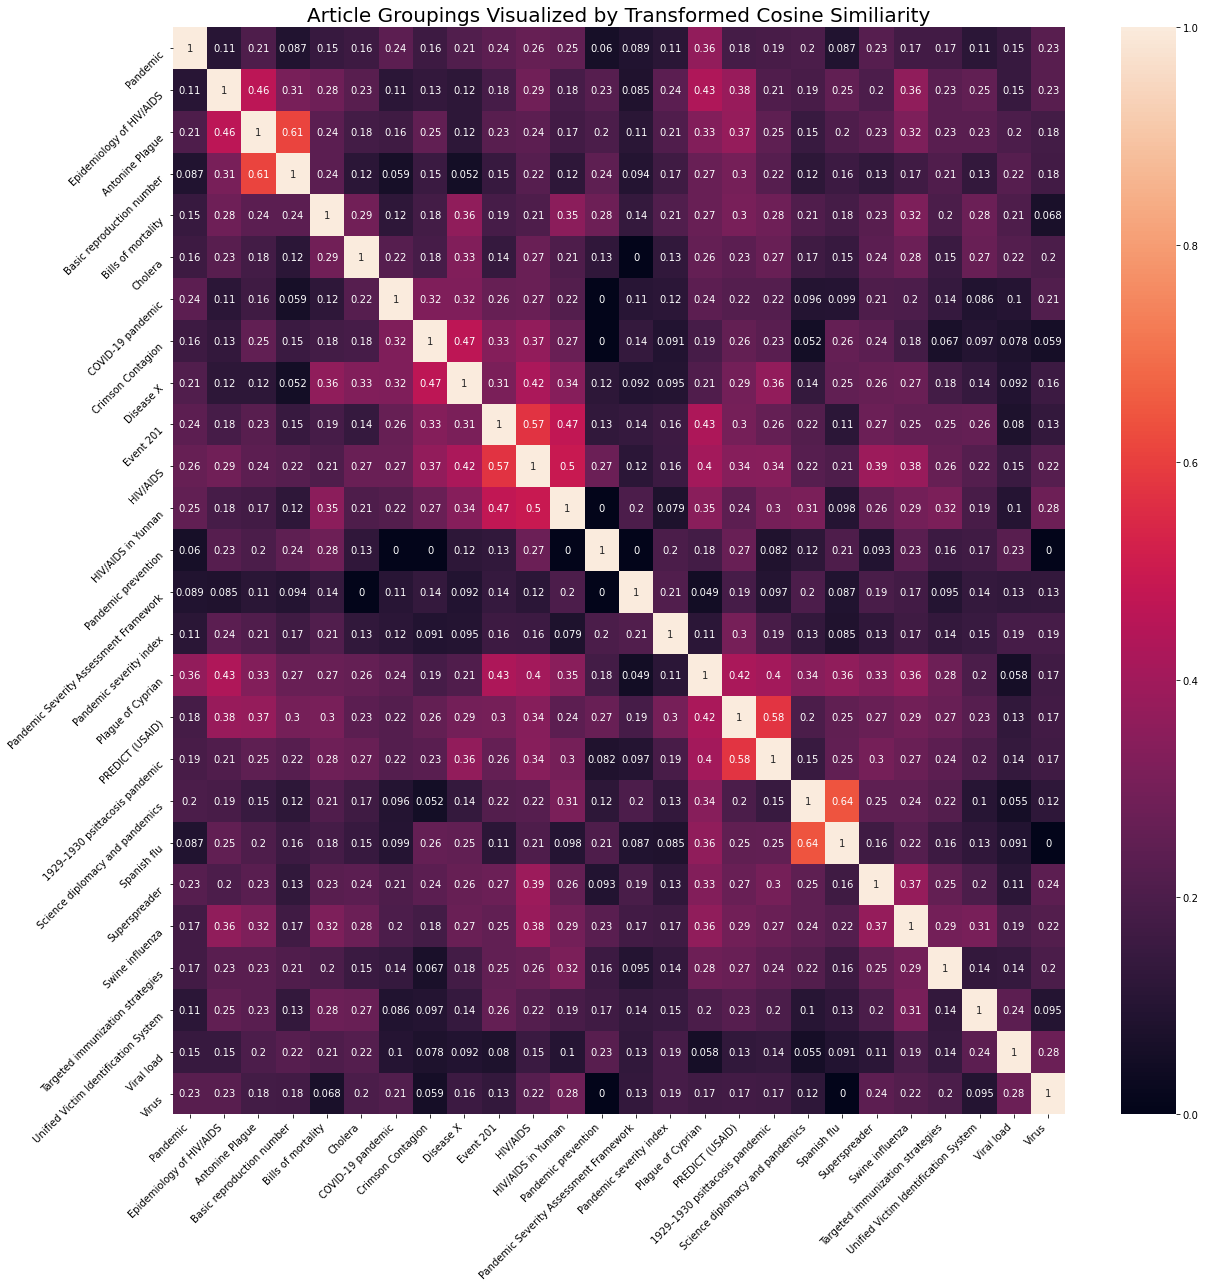

In [14]:
from sklearn.metrics.pairwise import linear_kernel
import seaborn as sns
grouped_result = result[indexes, :]
cosine_similarities = linear_kernel(grouped_result, grouped_result)
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(np.sqrt(cosine_similarities), annot=True)
ax.set_xticklabels(titles, rotation=45, ha='right')
ax.set_yticklabels(titles, rotation=45, va ='top')
plt.title('Article Groupings Visualized by Transformed Cosine Similiarity', size=20)
plt.show()

In [15]:
data[0].keys()

dict_keys(['title', 'text', 'url', 'tokenized_text'])

In [20]:
tfidf_list = []
for row in range(df.shape[0]):
    tfidf_dict = {df.columns.tolist()[i]:df.iloc[row,:].tolist()[i] for i in range(len(df.columns))}
    data[row]['tf_idf'] = tfidf_dict

In [21]:
data[0].keys()

dict_keys(['title', 'text', 'url', 'tokenized_text', 'tf_idf'])

In [22]:
data[0]['tf_idf']

{'14th': 0.11299764207007455,
 '165–166': 0.0,
 '2017.south': 0.0,
 '20th': 0.0,
 '5th': 0.0,
 '<': 0.0,
 '>': 0.0,
 '\\displaystyle': 0.0,
 'abbreviate': 0.0,
 'ability': 0.0,
 'able': 0.0,
 'absence': 0.0,
 'absolute': 0.0,
 'accelerate': 0.0,
 'access': 0.0,
 'accompany': 0.0,
 'accord': 0.0,
 'account': 0.0,
 'accurate': 0.0,
 'accurate.prevention': 0.0,
 'acquire': 0.0,
 'act': 0.0,
 'action': 0.0,
 'activate': 0.0,
 'active': 0.0,
 'actively': 0.0,
 'actual': 0.0,
 'acute': 0.0,
 'ad': 0.0,
 'adapt': 0.0,
 'add': 0.0,
 'administration': 0.0,
 'adopt': 0.0,
 'adult': 0.0,
 'advance': 0.0,
 'advisor': 0.0,
 'affect': 0.0695167964522911,
 'affected': 0.0,
 'afflict': 0.0,
 'africa': 0.0,
 'aftermath': 0.0,
 'age': 0.0,
 'agency': 0.0,
 'agent': 0.0,
 'aggressive': 0.0,
 'agree': 0.0,
 'aid': 0.0,
 'aids': 0.07370498189881068,
 'air': 0.0,
 'aire': 0.0,
 'airflow': 0.0,
 'airlines': 0.0,
 'alfonso': 0.0,
 'allergy': 0.0,
 'allow': 0.0,
 'amazon': 0.0,
 'america': 0.0,
 'american': 0.

In [23]:
def tfidf_search(query, corpus = sample_corpus):
        tfidf_vector = TfidfVectorizer(input = 'content', tokenizer = nlp_process)
        corpus_query = corpus.copy()
        corpus_query.append(query)
        result = tfidf_vector.fit_transform(corpus_query)
        cosine_similarities = linear_kernel(result[:-1, :], result[-1, :])
        df = pd.DataFrame(cosine_similarities)
        df.index = titles
        return(df.sort_values(by=0, ascending=False))

In [25]:
tfidf_search('china disease')

,0
HIV/AIDS in Yunnan,0.317902
Crimson Contagion,0.148499
Disease X,0.107623
Pandemic,0.088085
COVID-19 pandemic,0.083733
HIV/AIDS,0.081109
Antonine Plague,0.073916
Cholera,0.044419
Pandemic prevention,0.035005
Science diplomacy and pandemics,0.033092


In [26]:
with open('data_mod_2.json','w') as f:
    json.dump(data, f)